# MSB1015 Scientific programming
## Heart failure predicition model


During this project the goal is predicting Heart failure in the kaggle challenge Heart Failure Prediction. The database contains 12 Clinical features and 1 target. The features consitute several different data types form interger numbers, precentages, and binarized data.


### Pre-Processing
The first step was loading in the data and a preliminary exploration of the data.

In [86]:
# Importing neccesary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #for this document to work needs to be seaborn 0.11 or higher

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

# Loading in the heart failure data

df = pd.read_excel (r'Tom_data.xlsx')

# Preliminary data exploration
print(df.dtypes)
print(list(df.columns))
print(df.head())

age                         float64
anaemia                       int64
creatinine_phosphokinase    float64
diabetes                      int64
ejection_fraction           float64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                float64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                     582.0         0               20.0   
1  55.0        0                    7861.0         0               38.0   
2  65.0        0                     146.0         0               20.0   
3  50.0        1         

The data consist of of 13 columns; Age, Anaemia, Creatine_phosphokinase, Diabetes, Ejection_fraction, High_blood_pressure, Platelets, Serum_creatine, Serum_sodium, Sex, smoking, Time, and Death event. The orginal publication and meta data form the challenge provider was used, in order to better grasp how these columns were obtained. Below a list containing both a description of how these parameters were obtained and the datatype they have are displayed.

1. Age
    - This is the age of the patient at
    - interger data type
2. anaemia
    - This 
    - binary data type
3. creatine phosphokinase
    - .
    - interger data type
4. diabetes
    - .
    - binary data type
5. ejection fraction
    - .
    - fraction data type
6. high blood pressure
    - .
    - binary datatype
7. platelets
    - .
    - interger datatype
8. serum creatine
    - .
    - interger datatype
9. serum sodium
    - .
    - interger datatype
10. sex
    - sex of the patient expressed as a binary (0:male,1:female)
    - binary datatype
11. smoking
    - smoking status patient 
    - binary datatype
12. time
    - .
    - interger datatype
13. death event
    - .
    - binary datatype
    
Further manual exploration of the data showed 3 logical discprensies. The first was that in the age column several ages were expressed with decimal numbers. to correct for this the entire column was converted to interger data. The ejection fraction column has one negative value and an impossible high value which were both replaced with nan for future imputation. The same was done for the serum sodium variable which also had a impossible high variable.  

In [58]:
# changing columns (variables) to a logical data type
# convert the decimal numbers to interger numbers for the age column
df["age"] = df["age"].apply(np.int64)

#   ejection fraction has a negative value (-5) and a impossible high value (3.5e+06), these values are replaced with nan
df = df.replace(-5, np.nan)
df = df.replace(3.5e+06,np.nan)

#   serum_sodium has a impossible high value (2e+09), this is replaced with nan
df = df.replace(2e+09,np.nan)

df = df.drop([149], axis=0) # need to be removed if the issue of the 1 concetration of sodium is resolved


Visualization was done to further explore the variables. the data was converted, for this step, into seperate dataframes, In order to get the correct visualization per data type. 

C:\Users\tom\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


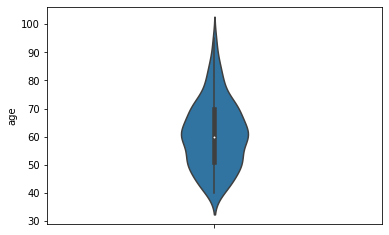

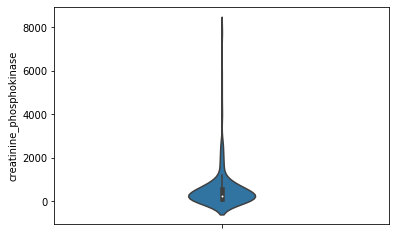

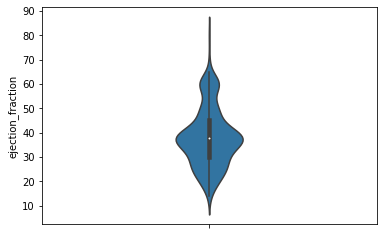

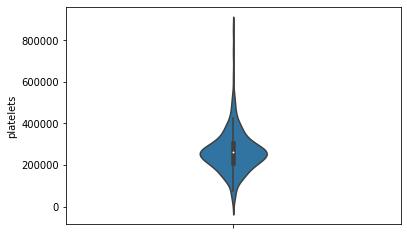

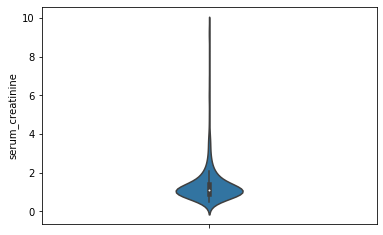

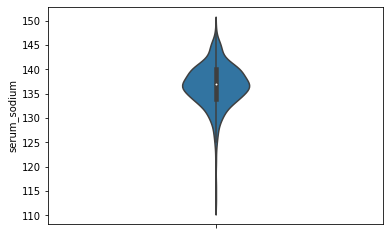

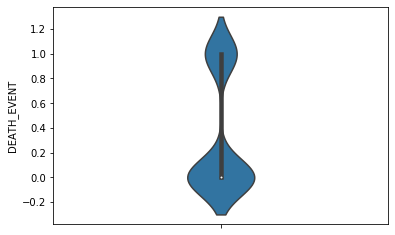

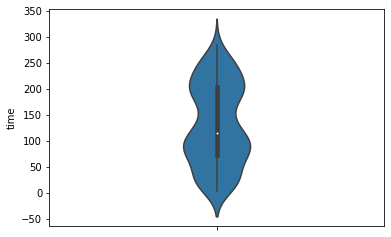

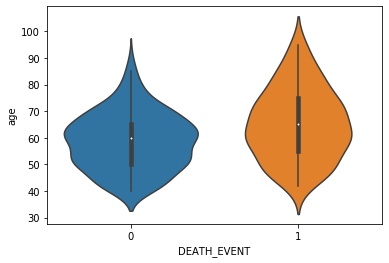

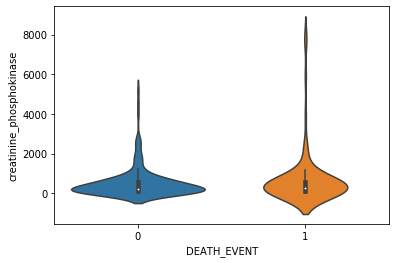

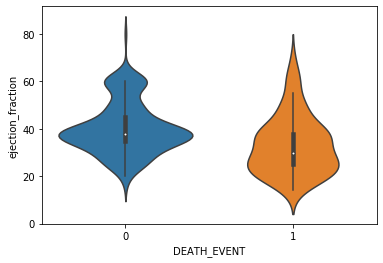

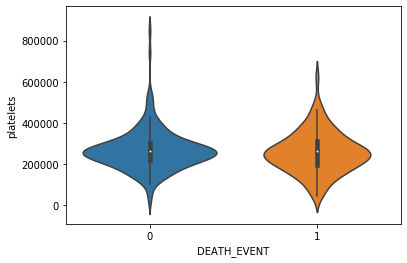

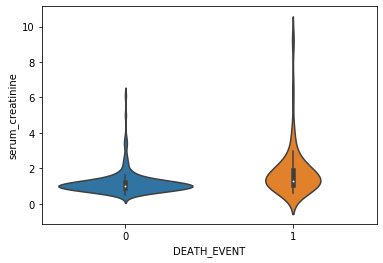

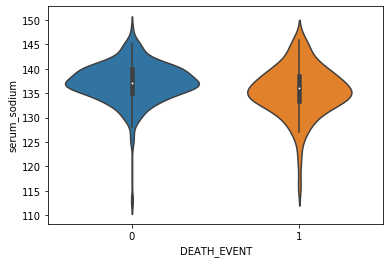

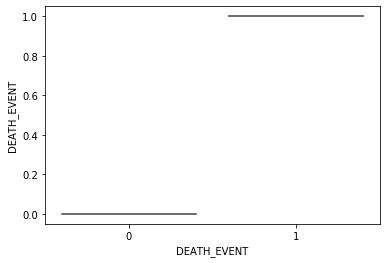

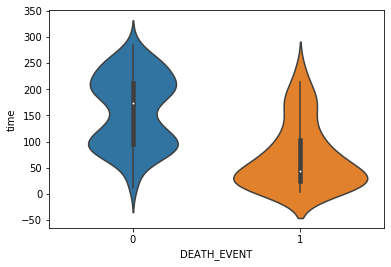

<Figure size 432x288 with 0 Axes>

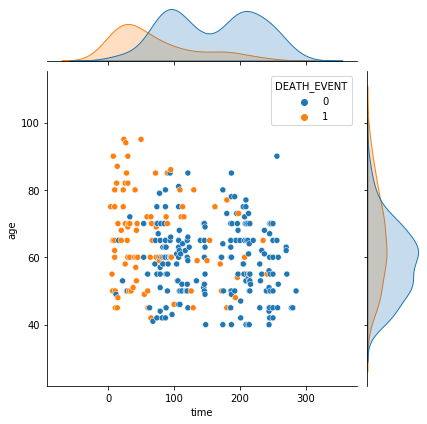

<Figure size 432x288 with 0 Axes>

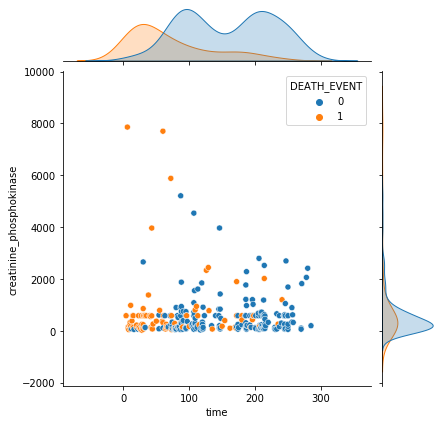

<Figure size 432x288 with 0 Axes>

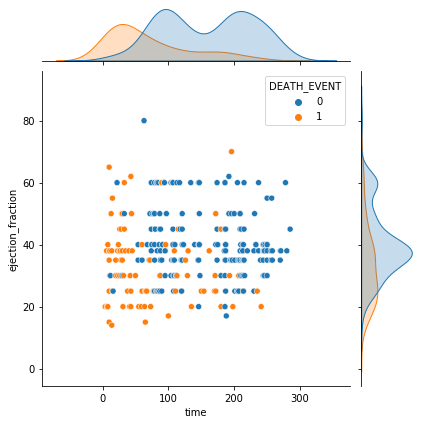

<Figure size 432x288 with 0 Axes>

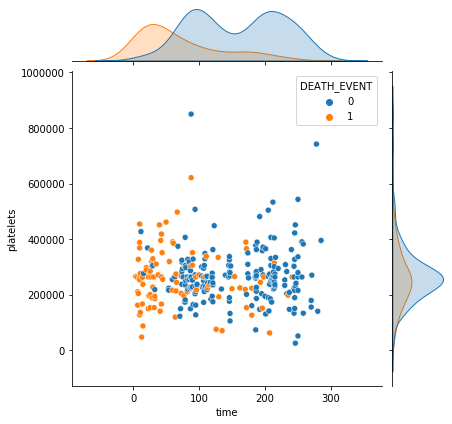

<Figure size 432x288 with 0 Axes>

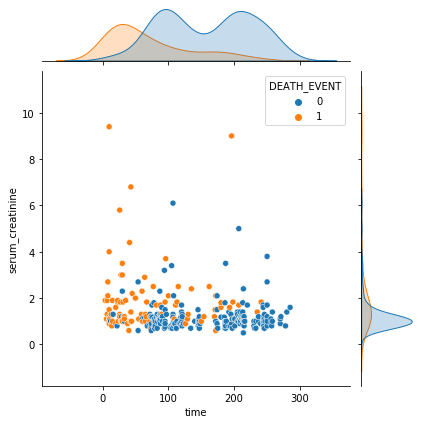

<Figure size 432x288 with 0 Axes>

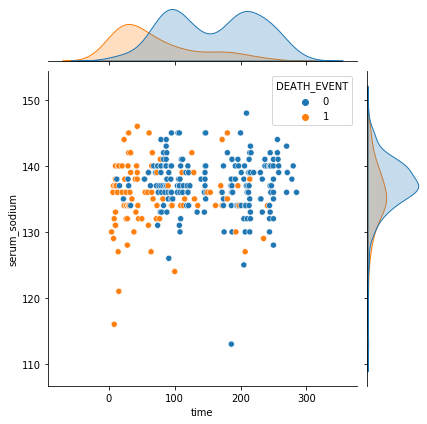

<Figure size 432x288 with 0 Axes>

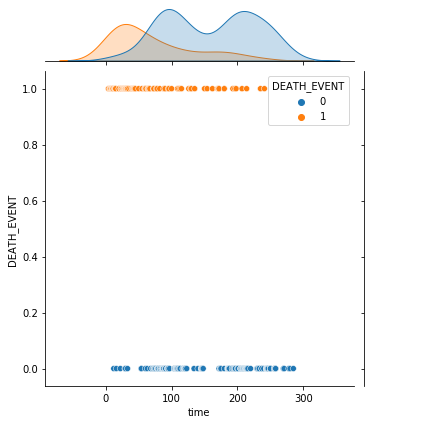

<Figure size 432x288 with 0 Axes>

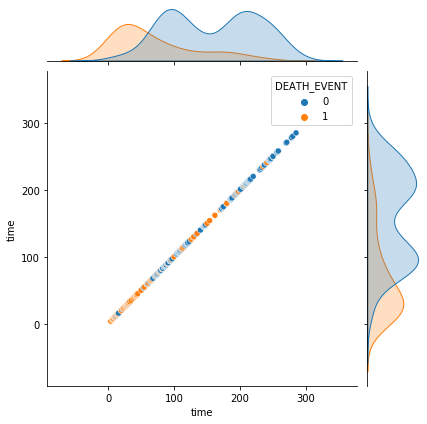

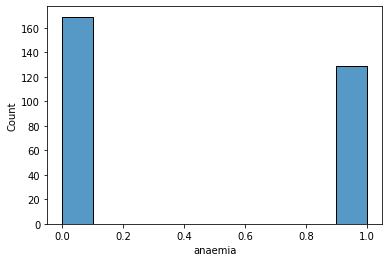

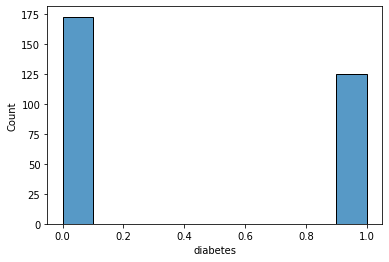

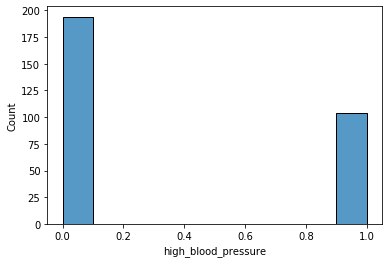

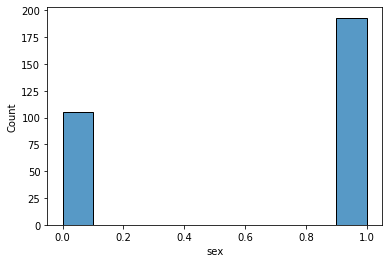

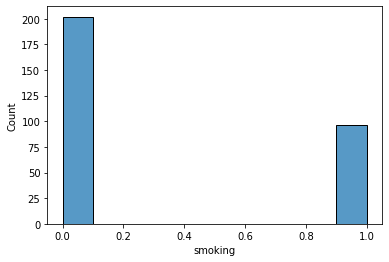

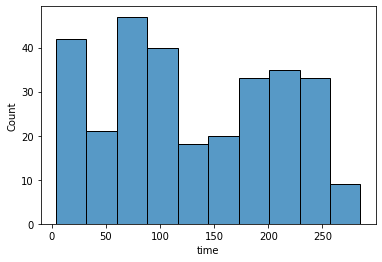

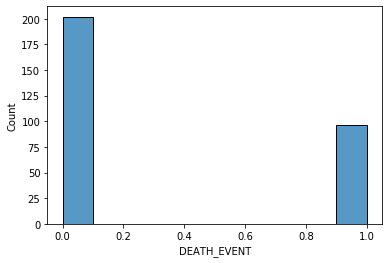

In [60]:
# seperating the different data types into sub-data frames for the visualization

df_binary = df[['anaemia',
                'diabetes',
                'high_blood_pressure',
                'sex',
                'smoking',
                'time',
                'DEATH_EVENT']]
df_interger_fraction = df[['age',
                           'creatinine_phosphokinase',
                           'ejection_fraction',
                           'platelets',
                           'serum_creatinine',
                           'serum_sodium',
                           'DEATH_EVENT',
                           'time']]

# to not get memory warnings about the amount of plots

plt.rcParams.update({'figure.max_open_warning': 0})

# violing plot, and joint plot for the interger variable type

for column in df_interger_fraction :
    plt.figure()
    sns.violinplot(y=df_interger_fraction[column],width= 0.2)
#   plt.savefig(column,'_violin.svg')

    
for column in df_interger_fraction :
    plt.figure()
    sns.violinplot(x=df_interger_fraction ['DEATH_EVENT'], y=df_interger_fraction[column])
    
for column in df_interger_fraction :
    plt.figure()
    sns.jointplot(data=df_interger_fraction, x="time", y=column, hue="DEATH_EVENT")

# histogram plots for the binary 

for column in df_binary :
    plt.figure()
    sns.histplot(data=df_binary, x=column)
 

due to the different data types normalization will not be preformed, scaling will be preformed. scaling will be done to using a min max scaler (0 to 1).

MinMaxScaler(copy=True, feature_range=(0, 1))
        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  0.636364      0.0                  0.071319       0.0           0.090909   
1  0.272727      0.0                  1.000000       0.0           0.363636   
2  0.454545      0.0                  0.015693       0.0           0.090909   
3  0.181818      1.0                  0.011227       0.0           0.090909   
4  0.454545      1.0                  0.017479       1.0           0.090909   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                  1.0   0.290823          0.157303      0.485714  1.0   
1                  0.0   0.288833          0.067416      0.657143  1.0   
2                  0.0   0.165960          0.089888      0.457143  1.0   
3                  0.0   0.224148          0.157303      0.685714  1.0   
4                  0.0   0.365984          0.247191      0.085714  0.0   

   smoking      time  DEATH_EVENT 

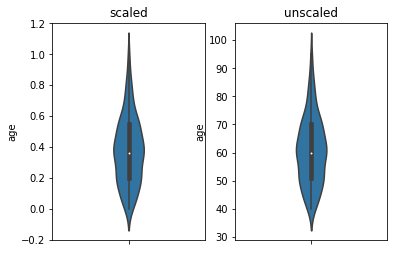

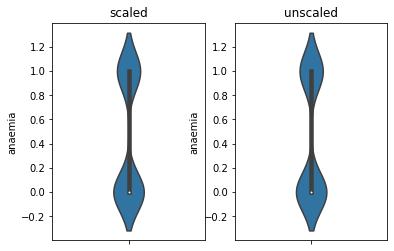

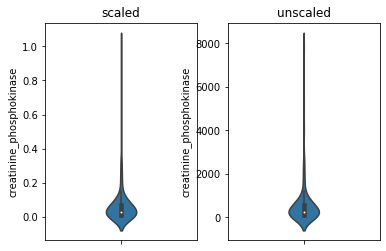

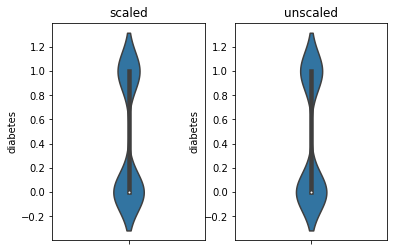

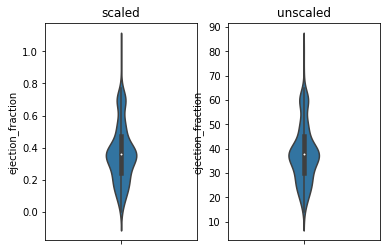

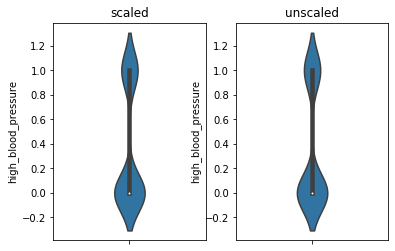

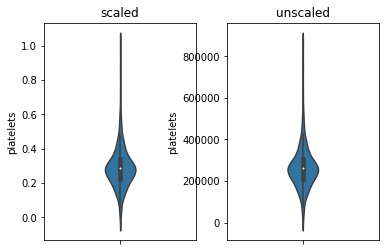

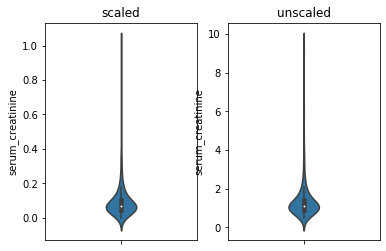

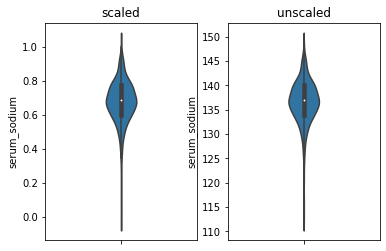

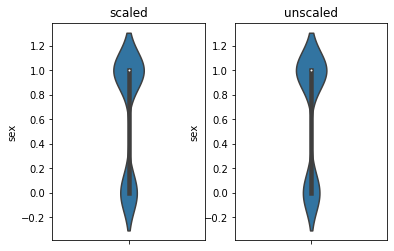

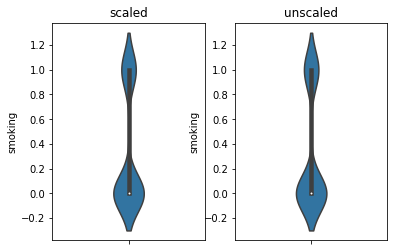

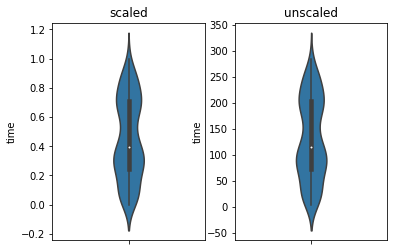

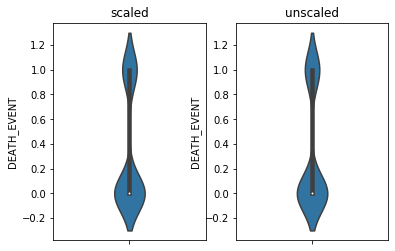

In [84]:
# scaling of the non binary variable collumns for distance based methods
scaler = MinMaxScaler()
print(scaler.fit(df))

# using the min max scaler and then converting the numpy array back to a pandas array
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(data=df_scaled, columns=df.columns.tolist())

print(df_scaled.head())

# plots to confirm scaling

for column in df_scaled :
       fig, (ax1, ax2) = plt.subplots(ncols=2)
       sns.violinplot(y=df_scaled[column],width= 0.2, ax=ax1).set_title("scaled")
       sns.violinplot(y=df[column],width= 0.2, ax=ax2).set_title("unscaled")


The scaling was succes full and did not significantly alter the distribution of the data that was present. The next step is the imputation of the nan values. The imputation will be done using a svd imputation method.

In [92]:
# calculating the amount of misisng values in total, per column, per row, and
#   total amount of rows containg missing values

missing_values_per_column = df_scaled.isnull().sum()
missing_values_total = df_scaled.isnull().sum().sum()
missing_values_per_row = []

for i in range(len(df_scaled.index)) :
    x = (df_scaled.iloc[i].isnull().sum())
    missing_values_per_row.append(x)

missing_values_per_row = np.array(missing_values_per_row)
missing_values_in_rows = missing_values_per_row.sum()
percentage_of_missing_values = (missing_values_in_rows/len(df_scaled))*100


# printing results of missing values amount
print('missing values total before imputment:',missing_values_total)
print('missing values per row before imputment:',missing_values_in_rows)
print('missing values per row precentage before imputment:',percentage_of_missing_values,'%')

# svd impuation of the missing values.
imputer = KNNImputer(n_neighbors=5)
df_scaled_imputed = imputer.fit_transform(df_scaled)
df_scaled_imputed = pd.DataFrame(data=df_scaled_imputed, columns=df.columns.tolist())

# repeat form above but for the imputed data

missing_values_per_column = df_scaled_imputed.isnull().sum()
missing_values_total = df_scaled_imputed.isnull().sum().sum()
missing_values_per_row = []

for i in range(len(df_scaled_imputed.index)) :
    x = (df_scaled_imputed.iloc[i].isnull().sum())
    missing_values_per_row.append(x)

missing_values_per_row = np.array(missing_values_per_row)
missing_values_in_rows = missing_values_per_row.sum()
percentage_of_missing_values = (missing_values_in_rows/len(df_scaled))*100

print('missing values total before imputment:',missing_values_total)
print('missing values per row before imputment:',missing_values_in_rows)
print('missing values per row precentage before imputment:',percentage_of_missing_values,'%')

missing values total before imputment: 15
missing values per row before imputment: 15
missing values per row precentage before imputment: 5.033557046979865 %
missing values total before imputment: 0
missing values per row before imputment: 0
missing values per row precentage before imputment: 0.0 %


to asses the qaulity of the imputment......

In [ ]:
# need to think of a method t